In [1]:
import torch.nn as nn
import torchvision
import numpy as np
import torch
import matplotlib.pyplot as plt
from datetime import datetime
import torchvision.transforms as transforms

In [2]:
train_fmnist = torchvision.datasets.FashionMNIST(root =".",train = True, transform  = transforms.ToTensor(),download =True)


In [3]:
train_fmnist

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
train_fmnist.data.shape

torch.Size([60000, 28, 28])

In [5]:
train_fmnist.targets.shape

torch.Size([60000])

In [6]:
train_fmnist.data.max()

tensor(255, dtype=torch.uint8)

In [7]:
train_fmnist.targets.max()

tensor(9)

In [8]:
X = train_fmnist.data
y = train_fmnist.targets

In [9]:
test_fmnist = torchvision.datasets.FashionMNIST(root=".",train = False,transform= transforms.ToTensor(),download  = True)

In [10]:
test_fmnist.data.shape

torch.Size([10000, 28, 28])

In [11]:
X_test = test_fmnist.data
Y_test = test_fmnist.targets

In [12]:
#dataloaders
batch_size =128
train_loader = torch.utils.data.DataLoader(dataset = train_fmnist , batch_size= batch_size,shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset= test_fmnist,batch_size = batch_size,shuffle = False)

In [13]:
#model building (OOPs)

class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()

    self.conv = nn.Sequential(
        nn.Conv2d(in_channels= 1,out_channels= 32, kernel_size = 3,stride = 2),
        nn.ReLU(),
        nn.Conv2d(in_channels = 32,out_channels= 64,kernel_size=3,stride = 2),
        nn.ReLU(),
        nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=2),
        nn.ReLU()
    )

    self.dense = nn.Sequential(
        nn.Dropout(0.2),
        nn.Linear(128*2*2,512),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(512,10)

    )

  def forward(self,x):
    out = self.conv(x)
    out = out.view(out.size(0),-1)
    out = self.dense(out)

    return out


In [14]:
X.shape

torch.Size([60000, 28, 28])

In [15]:
#testing view

X.view(X.size(0),-1).shape

torch.Size([60000, 784])

In [16]:
model = CNN()

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU()
  )
  (dense): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=512, out_features=512, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [18]:
criterion  = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [19]:
# #training

epochs = 15
train_loss = np.zeros(epochs)
test_loss = np.zeros(epochs)


for i in range(epochs):

  train_losses = []
  model.train()
  for inputs,targets in train_loader:


    optimizer.zero_grad()

    inputs = inputs.to(device)
    targets = targets.to(device)

    outputs = model(inputs)

    loss_train = criterion(outputs,targets)

    loss_train.backward()

    optimizer.step()

    train_losses.append(loss_train.item())
  
  train_losses = np.mean(train_losses)


  test_losses  = []
  model.eval()
  for inputs,targets in test_loader:

    inputs,targets = inputs.to(device),targets.to(device)

    outputs = model(inputs)

    loss_test = criterion(outputs,targets)

    test_losses.append(loss_test.item())

  test_losses = np.mean(test_losses)


  train_loss[i] = train_losses
  test_loss[i] = test_losses

  print(f"epoch- 1/{i+1} -- training loss -- {train_losses} -- test loss -- {test_losses}")



    
  

    
  


epoch- 1/1 -- training loss -- 0.6665937820477272 -- test loss -- 0.5006709981568253
epoch- 1/2 -- training loss -- 0.4379025399049462 -- test loss -- 0.4028474963918517
epoch- 1/3 -- training loss -- 0.3793917710402373 -- test loss -- 0.36789346043067644
epoch- 1/4 -- training loss -- 0.34203852865614615 -- test loss -- 0.34394354156300994
epoch- 1/5 -- training loss -- 0.31511859799117675 -- test loss -- 0.32506117243555527
epoch- 1/6 -- training loss -- 0.29160012403276686 -- test loss -- 0.31105974297734756
epoch- 1/7 -- training loss -- 0.27305196729232506 -- test loss -- 0.2941979369785212
epoch- 1/8 -- training loss -- 0.2561662978867986 -- test loss -- 0.2923377544819554
epoch- 1/9 -- training loss -- 0.24411476582987732 -- test loss -- 0.29284677588486974
epoch- 1/10 -- training loss -- 0.2266539076625157 -- test loss -- 0.28138421409869496
epoch- 1/11 -- training loss -- 0.21627164581246466 -- test loss -- 0.2881837660753274
epoch- 1/12 -- training loss -- 0.20256036504118174

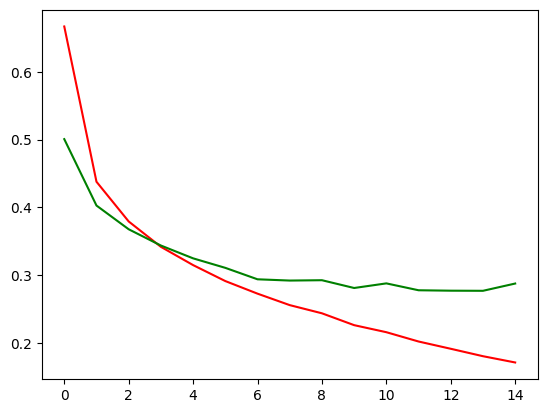

In [20]:
plt.plot(train_loss,label = "training loss", c = "r")
plt.plot(test_loss, label = "test loss", c = "g")
plt.show()

In [22]:
#accuracy

model.eval()

n_correct = 0
n_total = 0 

for inputs,targets in train_loader:

  inputs,targets = inputs.to(device),targets.to(device)

  outputs = model(inputs)

  _ , preds = torch.max(outputs,1)

  n_correct += (preds==targets).cpu().numpy().sum()

  n_total += len(targets)


train_acc = n_correct/n_total




n_correct = 0 
n_total = 0
for inputs,targets in test_loader:

  inputs,targets = inputs.to(device),targets.to(device)

  outputs = model(inputs)

  _, preds = torch.max(outputs,1)

  n_correct += (preds==targets).cpu().numpy().sum()

  n_total += len(targets)

test_acc = n_correct/n_total


print(f"training accuracy -- {train_acc} , test accuracy -- {test_acc}")





training accuracy -- 0.9541666666666667 , test accuracy -- 0.9009


In [23]:
test_loader = torch.utils.data.DataLoader(dataset = test_fmnist, batch_size = 10000,shuffle = False)

In [24]:
#Visualizing the results

for inputs, targets in test_loader:

  inputs= inputs.to(device)
  targets = targets.to(device)



  outputs = model(inputs)

  _,preds = torch.max(outputs,1)



In [25]:
targets = targets.cpu().numpy()
preds = preds.cpu().numpy()

In [26]:
idx = np.where(targets!=preds)

In [31]:
len(idx[0])

991

prediction 7
target 9


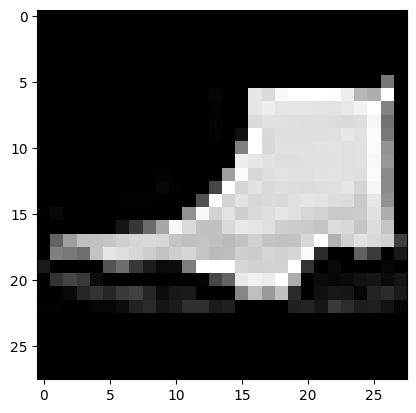

In [57]:
mis_idx = np.random.choice(idx[0])

print("prediction",preds[mis_idx])
print("target",targets[mis_idx])
plt.imshow(test_fmnist.data[mis_idx],cmap = "gray")
plt.show()